In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [13]:
success=0.3
print(np.random.binomial(1, 0.3, 1))
print(np.random.binomial(1, 0.3, 10))

print(sum(np.random.binomial(1, 0.3, 100)) / 100)
print(sum(np.random.binomial(1, 0.3, 10000)) / 10000)
print(sum(np.random.binomial(1, 0.3, 1000000)) / 1000000)

[0]
[1 0 1 0 0 1 0 0 0 0]
0.18
0.2948
0.300017


Y -> Victim's race
X -> Offender's race

We need P(Y=white)

P(Y=white | X=white) = 0.903

In [38]:
import random

sample_space = 365**3
different_days = 365*364*363
probability = different_days / sample_space
print(round(probability, 3))

n = 23
probability = 1
for i in range(n):
    probability *= (365-i) / 365

probability = 1 - probability
print(round(probability, 3))

population = list(range(1, 366))
result = 0
def sample_sim():
    global result
    sample = np.random.choice(population,
                                size=50,
                                replace=True)
    if len(sample) - len(set(sample)) > 0:
        result += 1

n = 100000
for _ in range(n):
    sample_sim()

print(result/n)

0.992
0.507
0.97066


In [43]:
result = np.random.binomial(30000000, 0.5, 1)[0] / 10000000
print(result)

1.4998709


In [48]:
result_a = 0.2 ** 10
result_b = 0.8 ** 10
print(round(result_a, 5), round(result_b, 5))

n = 10
success = 0.2
mean = n * success
std = ((n*success*(1-success))**0.5)
mean, std

0.0 0.10737


(2.0, 1.2649110640673518)

In [11]:
result = (5/6) ** 6
result

0.3348979766803842

Geometric distribution

pmf = (1-1/6) ** y-1 * 1/6

To have a Poisson distribution we should have:

- Independent trials
- All probabilities for each home are the same
- For very large n and small success binomial distribution is approximated by poisson distribution where mean=n*success

In [19]:
# B => 800-900
# MAX = 1000
# Total scores have approximately normal distribution
# mean=830 std=50
# What proportion of students receive B?
mean=830
std=50
z1_score = (800 - mean) / std
z2_score = (900 - mean) / std
print(f"Z scores = {z1_score}, {z2_score}")

z1_value = stats.norm.cdf(z1_score)
z2_value = stats.norm.cdf(z2_score)
proportion = z2_value - z1_value
round(proportion*100, 2)

Z scores = -0.6, 1.4


64.5

In [22]:
# People who score above 400 pass

# Group A
mean_A = 500
std_A = 100
# Group B
mean_B = 450
std_B = 100
# Both normal and same size

zA_score = (400 - mean_A) / std_A
zB_score = (400 - mean_B) / std_B
zA_value = stats.norm.cdf(zA_score)
zB_value = stats.norm.cdf(zB_score)

not_passed_A = zA_value
not_passed_B = zB_value
print(not_passed_A, not_passed_B)

people_from_B = not_passed_B / (not_passed_A + not_passed_B)
print(people_from_B)

0.15865525393145707 0.3085375387259869
0.660407317011445


In [23]:
# After they lowered the threshold to 300
zA_score = (300 - mean_A) / std_A
zB_score = (300 - mean_B) / std_B
zA_value = stats.norm.cdf(zA_score)
zB_value = stats.norm.cdf(zB_score)

not_passed_A = zA_value
not_passed_B = zB_value
print(not_passed_A, not_passed_B)

people_from_B = not_passed_B / (not_passed_A + not_passed_B)
print(people_from_B)

0.0227501319481792 0.06680720126885806
0.7459713109919708


Scale=0.5: Mean = 1.5, Std = 0.8660254037844386
Scale=1: Mean = 3, Std = 1.7320508075688772
Scale=2: Mean = 6, Std = 3.4641016151377544
Scale=3: Mean = 9, Std = 5.196152422706632
Scale=4: Mean = 12, Std = 6.928203230275509
Scale=5: Mean = 15, Std = 8.660254037844387


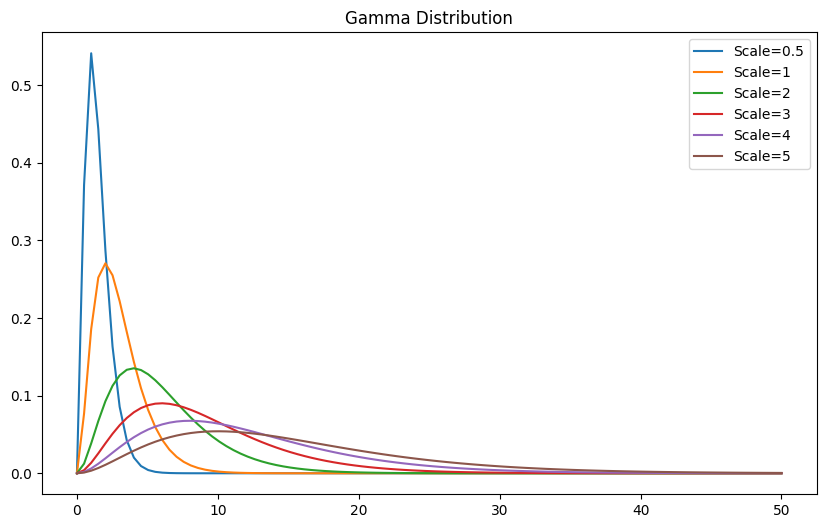

In [30]:
x = np.linspace(0, 50, 100)
scales = [0.5, 1, 2, 3, 4, 5]
shape = 3

fig = plt.figure(figsize=(10, 6))
plt.title("Gamma Distribution")
for scale in scales:
    y = stats.gamma.pdf(x, a=shape, scale=scale)
    mean = shape * scale  # Mean of the gamma distribution
    std = np.sqrt(shape * scale**2)  # Standard deviation of the gamma distribution
    print(f"Scale={scale}: Mean = {mean}, Std = {std}")
    plt.plot(x, y, label=f"Scale={scale}")
plt.legend()
plt.show()


In [3]:
url="http://stat4ds.rwth-aachen.de/data/Afterlife.dat"
data = pd.read_csv(url, header=None) 
data

,0
0,subject postlife religion gender
1,1 1 1 1
2,2 1 1 1
3,3 1 1 1
4,4 1 1 1
...,...
1549,1549 2 3 2
1550,1550 2 3 2
1551,1551 2 3 2
1552,1552 2 3 2


In [4]:
dataframe = pd.DataFrame(columns=["LifeAfterDeath", "Religion"])

for index, row in data.iterrows():
    if index == 0:
        continue
    dataframe.loc[index] = (row[0].split(" ")[6], row[0].split(" ")[8])

print(dataframe.head())

dataframe["LifeAfterDeath"] = dataframe["LifeAfterDeath"].astype(int)
dataframe["Religion"] = dataframe["Religion"].astype(int) 

contingency_table = pd.crosstab(index=dataframe["Religion"],  # Rows: Religion
                                columns=dataframe["LifeAfterDeath"],  # Columns: LifeAfterDeath
                                rownames=["Religion"],
                                colnames=["Belief in Afterlife"])

print(contingency_table)


  LifeAfterDeath Religion
1              1        1
2              1        1
3              1        1
4              1        1
5              1        1
Belief in Afterlife    1    2
Religion                     
1                    956  114
2                    384   65
3                     17   17


In [8]:
contingency_table

Belief in Afterlife,1,2
Religion,,
1,956,114
2,384,65
3,17,17


In [25]:
data = {1: [956, 384, 17],
        2: [114, 65, 17]}
contigency_table_normalized = pd.DataFrame(data)
total = contigency_table_normalized.values.sum()
contigency_table_normalized /= total
contigency_table_normalized[3] = (contigency_table_normalized[1][0] + contigency_table_normalized[2][0],
                                  contigency_table_normalized[1][1] + contigency_table_normalized[2][1],
                                  contigency_table_normalized[1][2] + contigency_table_normalized[2][2])
contigency_table_normalized

,1,2,3
0,0.615583,0.073406,0.688989
1,0.247263,0.041854,0.289118
2,0.010947,0.010947,0.021893


In [19]:
contigency_table_normalized.values.sum() # should be 1

1.0

In [23]:
0.073406 + 0.041854 + 0.010947

0.126207

X -> Religion

Y -> Believe in afterdeath

marginal distribution of Y = (0.8736, 0.126207)

marginal distribution of X = (0.688, 0.289, 0.021)

P(X=x | Y=y) = 1* 1 * 0.61 + 1 * 2 + 0.07 + ... + 2 * 2 * 0.01

In [32]:
selected_columns = [1, 2]
selected_rows = contigency_table_normalized.iloc[:3]

result = 0
for index, row in selected_rows.iterrows():  
    for i, col in enumerate(selected_columns):
        result += col * (index+1) * row[col]
        print(f"P(X={col} | Y={index+1}): {row[col]}")

result

P(X=1 | Y=1): 0.6155827430779137
P(X=2 | Y=1): 0.07340631036703155
P(X=1 | Y=2): 0.24726336123631681
P(X=2 | Y=2): 0.04185447520927238
P(X=1 | Y=3): 0.010946555054732776
P(X=2 | Y=3): 0.010946555054732776


1.5228589826142949

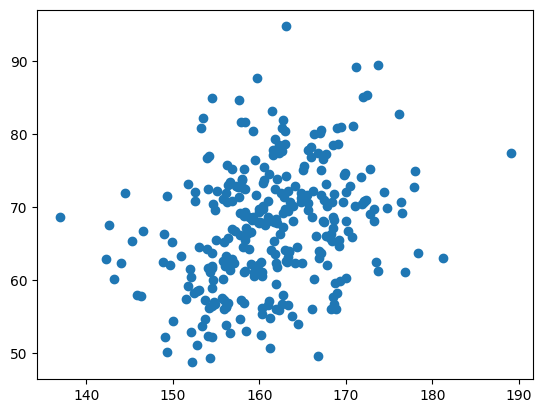

In [7]:
x = np.random.normal(loc=162, scale=7, size=300)
y = np.random.normal(loc=3 + 0.4*x, scale=8, size=300)
plt.scatter(x, y)
plt.show()

In [9]:
# I guess correlation between 0.3 - 0.4
correlation = np.corrcoef(x, y)[0][1]
correlation

0.3059484253381572